In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df=pd.read_csv('yahoo_stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [4]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1825 non-null   datetime64[ns]
 1   High       1825 non-null   float64       
 2   Low        1825 non-null   float64       
 3   Open       1825 non-null   float64       
 4   Close      1825 non-null   float64       
 5   Volume     1825 non-null   float64       
 6   Adj Close  1825 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 99.9 KB


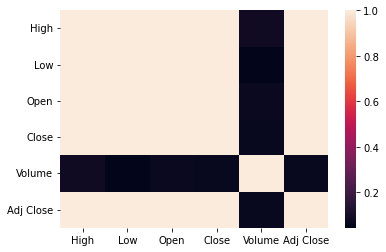

In [7]:
sns.heatmap(df.corr());

In [8]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [9]:
features=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

<AxesSubplot:xlabel='Date', ylabel='High'>

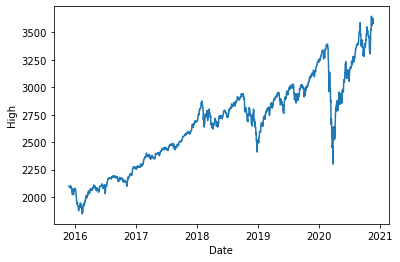

In [10]:
sns.lineplot(x='Date',y='High',data=df)

In [11]:
high_dataset=pd.DataFrame(data=df,columns=['High'])

In [12]:
from statsmodels.tsa.arima.model import ARIMA 


In [14]:
model=ARIMA(high_dataset,order=(4,2,0))
model_fit=model.fit()

In [15]:
high_dataset.head()

,High
0,2095.610107
1,2094.120117
2,2093.000000
3,2093.000000
4,2093.290039


In [16]:
y_pred=model_fit.predict(0,len(high_dataset))
y_pred

0          0.000000
1       3143.420652
2       2093.474317
3       2092.119783
4       2092.408034
           ...     
1821    3639.239218
1822    3633.267262
1823    3624.214459
1824    3581.675246
1825    3576.855096
Name: predicted_mean, Length: 1826, dtype: float64

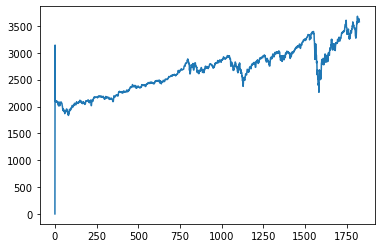

In [17]:
plt.plot(y_pred)

<AxesSubplot:>

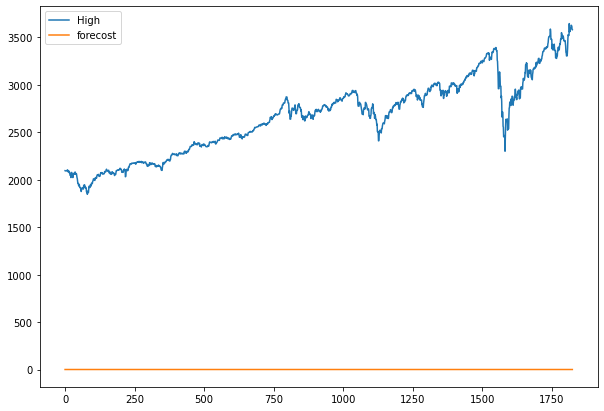

In [20]:
df['forecost']=model_fit.predict(start=0,end=len(high_dataset),dynamic=True)
df[['High','forecost']].plot(figsize=(10,7))